<a href="https://colab.research.google.com/github/Goyo0117970/TelecomX-2/blob/main/TelecomX%202%20Machine%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INFORME:
El siguiente Análisis busca identificar posibles factores de deserción de clientes de la Empresa Telecom X, ya que muchos han decidio prescindir de nuestros servicios, lo cual es preocupante para la Gerencia, por este motivo hacen entrega de archivo de base de datos para realizar el análisis correspondiente del caso y detectar el o los posibles motivos de estas decisiones negativas que afectan de manera directa a esta empresa. Este estudio se realizará con Machine Learning, lo cual es una herramienta muy robusta y especialmente diseñada para este tipo de caso. Esta base de datos maneja los siguientes campos:

Diccionario de datos

customerID: número de identificación único de cada cliente

Churn: si el cliente dejó o no la empresa

gender: género (masculino y femenino)

SeniorCitizen: información sobre si un cliente tiene o no una edad igual o mayor a 65 años

Partner: si el cliente tiene o no una pareja

Dependents: si el cliente tiene o no dependientes

tenure: meses de contrato del cliente

PhoneService: suscripción al servicio telefónico

MultipleLines: suscripción a más de una línea telefónica

InternetService: suscripción a un proveedor de internet

OnlineSecurity: suscripción adicional de seguridad en línea

OnlineBackup: suscripción adicional de respaldo en línea

DeviceProtection: suscripción adicional de protección del dispositivo

TechSupport: suscripción adicional de soporte técnico, menor tiempo de espera

StreamingTV: suscripción de televisión por cable

StreamingMovies: suscripción de streaming de películas

Contract: tipo de contrato

PaperlessBilling: si el cliente prefiere recibir la factura en línea

PaymentMethod: forma de pago

Charges.Monthly: total de todos los servicios del cliente por mes

Charges.Total: total gastado por el cliente

##📌 Extracción

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import requests
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'
dato = requests.get(url)

##🔧 Transformación

In [126]:
data = dato.json()
df = pd.json_normalize(data)
#print(df.head())
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [127]:
df.shape

(7267, 21)

In [128]:
print(df['Churn'].unique())

['No' 'Yes' '']


In [129]:
df = df[df["Churn"].notna()].copy()

In [130]:
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})

In [131]:
print(df['Churn'].unique())

[ 0.  1. nan]


El campo Churn tenía las opciones Yes y No, por tal motivo y para que sea mejor entendido en el entrenamiento se procede a cambiar a 0 y 1, pero se observan que existen campos sin datos por lo cual se procede a eliminarlos y de esta forma podamos tener unos datos más expeditos

In [132]:
df = df[df["Churn"].notna()].copy()


In [34]:
print(df["Churn"].unique())         # → [0, 1]
print(df["Churn"].isna().sum())     # → 0


[0. 1.]
0


In [133]:
df["Churn"] = df["Churn"].astype(int)

In [134]:
df.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [135]:
print(df['Churn'].unique())

[0 1]


In [136]:
X = df.drop(columns=["Churn"])
y = df["Churn"]


In [137]:
print(y.isnull().sum())


0


In [138]:
print(X.isnull().sum().sort_values(ascending=False).head(10))


customerID                  0
customer.gender             0
customer.SeniorCitizen      0
customer.Partner            0
customer.Dependents         0
customer.tenure             0
phone.PhoneService          0
phone.MultipleLines         0
internet.InternetService    0
internet.OnlineSecurity     0
dtype: int64


In [139]:
print(df.isnull().sum().sort_values(ascending=False).head(10))


customerID                  0
Churn                       0
customer.gender             0
customer.SeniorCitizen      0
customer.Partner            0
customer.Dependents         0
customer.tenure             0
phone.PhoneService          0
phone.MultipleLines         0
internet.InternetService    0
dtype: int64


In [140]:
print(y.value_counts(dropna=False))
print(y.dtype)


Churn
0    5174
1    1869
Name: count, dtype: int64
int64


Revisando que no exista campos vacios

In [141]:
missing_counts = X.isnull().sum()
missing_cols = missing_counts[missing_counts > 0]
print(missing_cols.sort_values(ascending=False))


Series([], dtype: int64)


In [142]:
# Resetear índices del DataFrame original
df_clean = df.copy().reset_index(drop=True)

# Definir X e y sincronizados
y = df_clean["Churn"]
X = df_clean.drop(columns=["Churn", "customerID"])


Probando varios modelos para obtener mejores resultados

In [143]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)


In [144]:
# Codificar variables categóricas
X_train_encoded = pd.get_dummies(X_train, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, drop_first=True)

# Alinear columnas entre train y test
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


In [145]:
X_train.select_dtypes(include='object').columns

Index(['customer.gender', 'customer.Partner', 'customer.Dependents',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Total'],
      dtype='object')

In [146]:
X_train_encoded = pd.get_dummies(X_train, drop_first=True)

In [147]:
X_test_encoded = pd.get_dummies(X_test, drop_first=True)
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)


##Comparando 3 potentes modelos predictivos: Random Forest, Decision Tree y Losgistic Regression

In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

# Definir los modelos
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Evaluar cada modelo
for name, model in models.items():
    model.fit(X_train_encoded, y_train)
    y_pred = model.predict(X_test_encoded)
    y_proba = model.predict_proba(X_test_encoded)[:, 1]

    print(f"\n🔍 {name}")
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC: {roc_auc_score(y_test, y_proba):.4f}")



🔍 Random Forest
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1035
           1       0.66      0.44      0.53       374

    accuracy                           0.79      1409
   macro avg       0.74      0.68      0.70      1409
weighted avg       0.78      0.79      0.77      1409

ROC AUC: 0.8278

🔍 Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1035
           1       0.56      0.48      0.51       374

    accuracy                           0.76      1409
   macro avg       0.69      0.67      0.68      1409
weighted avg       0.75      0.76      0.75      1409

ROC AUC: 0.6700

🔍 Logistic Regression
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1035
           1       0.64      0.53      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      

Tomaremos Logistic Regression ya que posee el recall más alto en Churn = 1, así mismo ajustamos el umbral a 0.3

In [149]:
from sklearn.linear_model import LogisticRegression

# Entrenar modelo
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000)
lr_model.fit(X_train_encoded, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [150]:
# Probabilidades de clase 1
y_proba_lr = lr_model.predict_proba(X_test_encoded)[:, 1]

#Ajustamos el Umbral a 0.3
threshold = 0.3
y_pred_adjusted = (y_proba_lr >= threshold).astype(int)


In [151]:
from sklearn.metrics import classification_report, confusion_matrix

# Reporte de clasificación
print(classification_report(y_test, y_pred_adjusted, digits=3))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred_adjusted)
print("Matriz de confusión:\n", cm)


              precision    recall  f1-score   support

           0      0.936     0.596     0.728      1035
           1      0.443     0.888     0.591       374

    accuracy                          0.674      1409
   macro avg      0.689     0.742     0.660      1409
weighted avg      0.805     0.674     0.692      1409

Matriz de confusión:
 [[617 418]
 [ 42 332]]


El objetivo es no dejar escapar churns, y con 0.3 el recall para churn fue muy alto (0.888), lo que significa que se captura la mayoría de los clientes que realmente se van a ir, aunque aumenten los falsos positivos.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.p

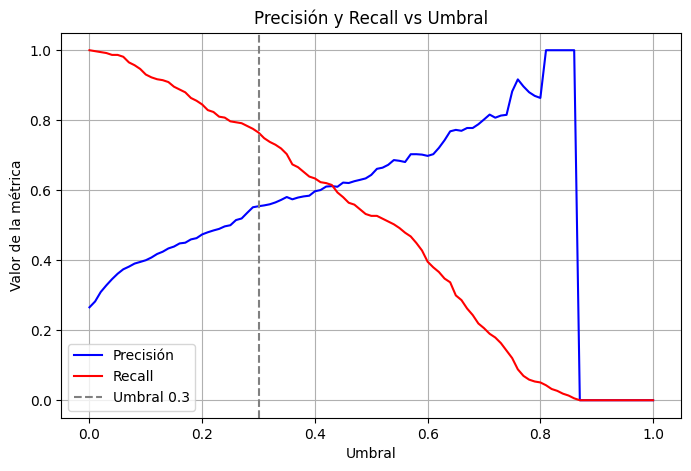

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score

# Probabilidades predichas con tu modelo
y_proba = model.predict_proba(X_test_encoded)[:, 1]

thresholds = np.arange(0, 1.01, 0.01)
precisions = []
recalls = []

for t in thresholds:
    y_pred_threshold = (y_proba >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred_threshold))
    recalls.append(recall_score(y_test, y_pred_threshold))

plt.figure(figsize=(8,5))
plt.plot(thresholds, precisions, label="Precisión", color='blue')
plt.plot(thresholds, recalls, label="Recall", color='red')
plt.axvline(x=0.3, color='gray', linestyle='--', label="Umbral 0.3")
plt.xlabel("Umbral")
plt.ylabel("Valor de la métrica")
plt.title("Precisión y Recall vs Umbral")
plt.legend()
plt.grid(True)
plt.show()


Tal como lo muestra la gráfica de precisión el umbral seleccionado es bueno

In [152]:
# Verificar si hay columnas no numéricas
X_clean = X.copy()
X_clean = pd.get_dummies(X_clean, drop_first=True)

# Confirmar que todas las columnas son numéricas
print(X_clean.dtypes.value_counts())

bool       6556
int64         2
float64       1
Name: count, dtype: int64


In [153]:
# Convertir columnas booleanas a enteros
X_clean = X_clean.astype({col: int for col in X_clean.select_dtypes('bool').columns})

# Confirmar que todo es numérico
print(X_clean.dtypes.value_counts())


int64      6558
float64       1
Name: count, dtype: int64


In [154]:
# Verificar las columnas que usó el modelo
print(model.feature_names_in_)
print("Cantidad:", len(model.feature_names_in_))


['customer.SeniorCitizen' 'customer.tenure' 'account.Charges.Monthly' ...
 'account.Charges.Total_999.45' 'account.Charges.Total_999.8'
 'account.Charges.Total_999.9']
Cantidad: 5312


In [155]:
print(X_clean.columns.tolist())
print("Cantidad:", X_clean.shape[1])


['customer.SeniorCitizen', 'customer.tenure', 'account.Charges.Monthly', 'customer.gender_Male', 'customer.Partner_Yes', 'customer.Dependents_Yes', 'phone.PhoneService_Yes', 'phone.MultipleLines_No phone service', 'phone.MultipleLines_Yes', 'internet.InternetService_Fiber optic', 'internet.InternetService_No', 'internet.OnlineSecurity_No internet service', 'internet.OnlineSecurity_Yes', 'internet.OnlineBackup_No internet service', 'internet.OnlineBackup_Yes', 'internet.DeviceProtection_No internet service', 'internet.DeviceProtection_Yes', 'internet.TechSupport_No internet service', 'internet.TechSupport_Yes', 'internet.StreamingTV_No internet service', 'internet.StreamingTV_Yes', 'internet.StreamingMovies_No internet service', 'internet.StreamingMovies_Yes', 'account.Contract_One year', 'account.Contract_Two year', 'account.PaperlessBilling_Yes', 'account.PaymentMethod_Credit card (automatic)', 'account.PaymentMethod_Electronic check', 'account.PaymentMethod_Mailed check', 'account.Ch

In [156]:
# Filtrar X_clean para que tenga solo las columnas usadas por el modelo
X_aligned = X_clean[model.feature_names_in_]


In [157]:
explainer = shap.Explainer(model, X_aligned)
shap_values = explainer(X_aligned)


Buscando las variables que más afectan al Churn

In [158]:
# Convertir SHAP values a matriz si es necesario
shap_array = shap_values.values if hasattr(shap_values, "values") else shap_values

# Calcular importancia media absoluta por variable
mean_abs_shap = np.abs(shap_array).mean(axis=0)

# Crear DataFrame ordenado
importance_df = pd.DataFrame({
    'feature': X_aligned.columns,
    'mean_abs_shap': mean_abs_shap
}).sort_values(by='mean_abs_shap', ascending=False)

# Mostrar las 5 variables más influyentes
print(importance_df.head(5))


                                 feature  mean_abs_shap
1                        customer.tenure       0.751681
24             account.Contract_Two year       0.481498
9   internet.InternetService_Fiber optic       0.469806
23             account.Contract_One year       0.204576
8                phone.MultipleLines_Yes       0.191013


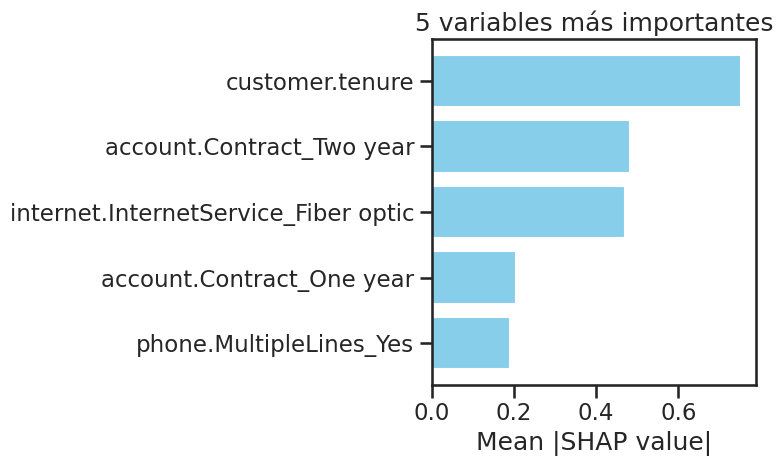

In [159]:
import matplotlib.pyplot as plt

# Tomar las 5 más importantes
top_features = importance_df.head(5)

# Graficar
plt.figure(figsize=(8, 5))
plt.barh(top_features['feature'][::-1], top_features['mean_abs_shap'][::-1], color='skyblue')
plt.xlabel('Mean |SHAP value|')
plt.title('5 variables más importantes')
plt.tight_layout()
plt.show()


Segmentación de riesgos

In [160]:
# Crear copia del dataset para segmentar
df_segmentado = X_aligned.copy()

# Añadir columna de riesgo
df_segmentado['Riesgo'] = 'Bajo'

# Regla 1: Tenure bajo + contrato corto + fibra óptica → Alto riesgo
df_segmentado.loc[
    (df_segmentado['customer.tenure'] < 12) &
    (df_segmentado['account.Contract_Two year'] == 0) &
    (df_segmentado['internet.InternetService_Fiber optic'] == 1),
    'Riesgo'
] = 'Alto'

# Regla 2: Tenure medio + contrato de 1 año → Riesgo medio
df_segmentado.loc[
    (df_segmentado['customer.tenure'].between(12, 24)) &
    (df_segmentado['account.Contract_One year'] == 1),
    'Riesgo'
] = 'Medio'

# Ver distribución
print(df_segmentado['Riesgo'].value_counts())


Riesgo
Bajo     5944
Alto      880
Medio     219
Name: count, dtype: int64


BASADO EN ESTE RESULTADO SE DETERMINA LO SIGUIENTE:

Alto riesgo (880 clientes): foco inmediato para campañas de retención. Se  Pueden priorizar llamadas, descuentos, o intervenciones personalizadas.

Riesgo medio (219 clientes): seguimiento proactivo. Quizás emails, encuestas, o mejoras en el servicio.

Bajo riesgo (5944 clientes): mantener convenios, pero sin invertir demasiado.

/tmp/ipython-input-2163983538.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_segmentado, x='Riesgo', palette='Set2')


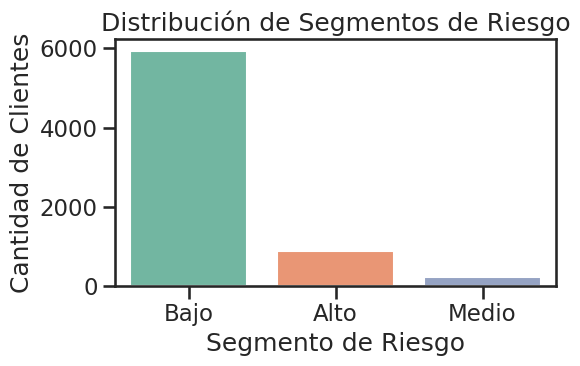

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(data=df_segmentado, x='Riesgo', palette='Set2')
plt.title('Distribución de Segmentos de Riesgo')
plt.xlabel('Segmento de Riesgo')
plt.ylabel('Cantidad de Clientes')
plt.tight_layout()
plt.show()


/tmp/ipython-input-3711534585.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y=var, data=df_plot, ax=ax, palette='Set2')
/tmp/ipython-input-3711534585.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='churn', data=df_plot, ax=ax, palette='Set2',
/tmp/ipython-input-3711534585.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=var, y='churn', data=df_plot, ax=ax, palette='Set2',
/tmp/ipython-input-3711534585.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in 

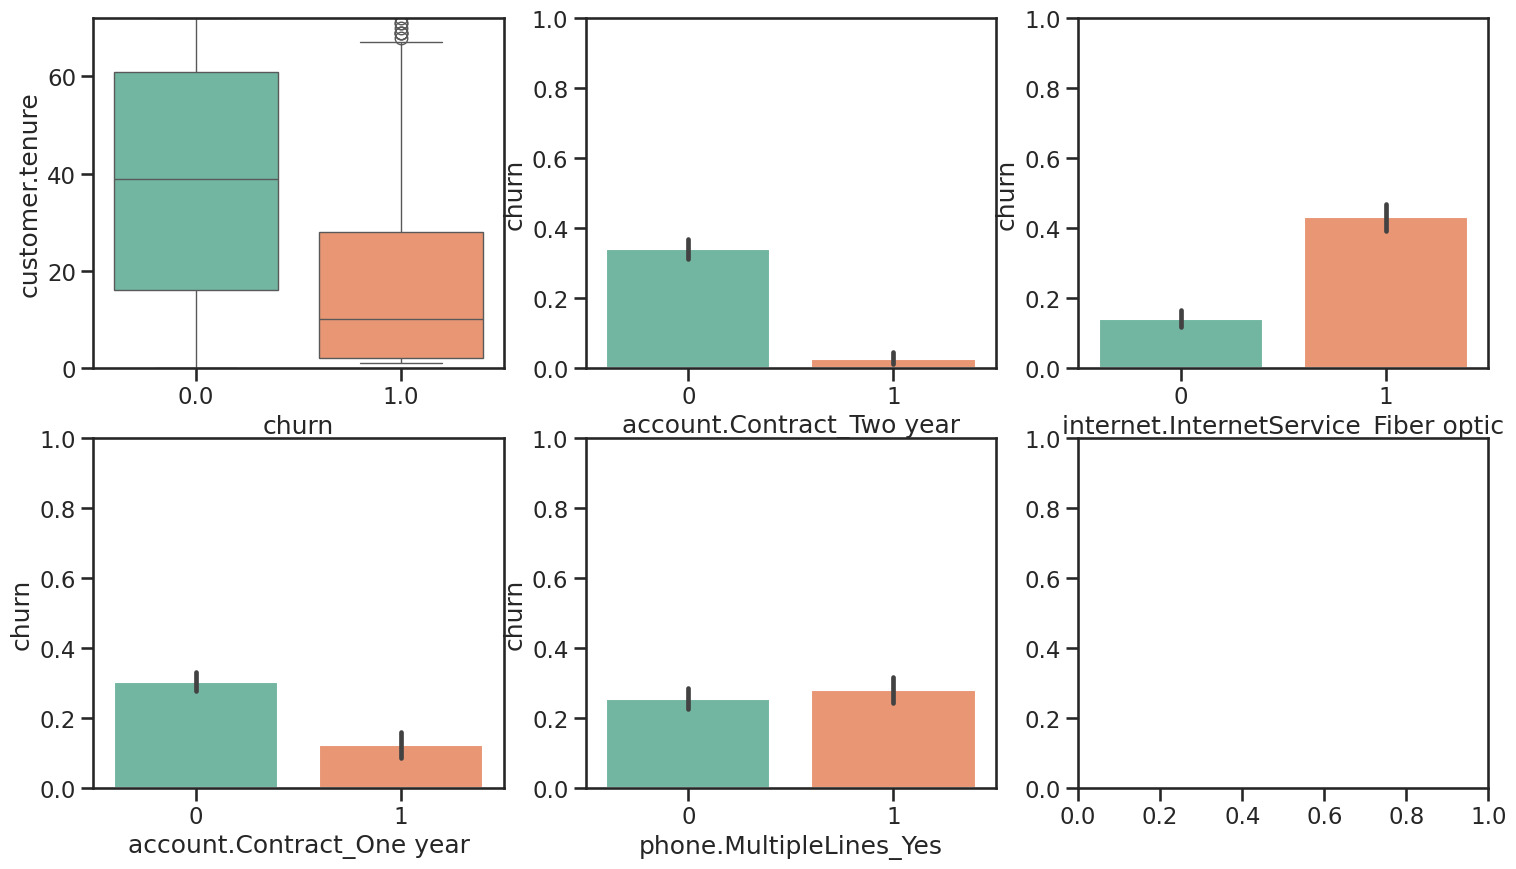

In [162]:
import matplotlib.pyplot as plt
import seaborn as sns

# Unir X_aligned con la columna churn
df_plot = X_aligned.copy()
df_plot['churn'] = y_test  # Asegurate que y_test esté alineado

# Lista de variables más influyentes
top_vars = [
    'customer.tenure',
    'account.Contract_Two year',
    'internet.InternetService_Fiber optic',
    'account.Contract_One year',
    'phone.MultipleLines_Yes'
]

# Crear gráficos
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
axes = axes.flatten()

# Definir escala común
y_min, y_max = df_plot[top_vars].min().min(), df_plot[top_vars].max().max()

for i, var in enumerate(top_vars):
    ax = axes[i]

    if df_plot[var].nunique() > 10:
        # Variable continua → boxplot
        sns.boxplot(x='churn', y=var, data=df_plot, ax=ax, palette='Set2')
        ax.set_ylim(y_min, y_max)
    else:
        # Variable categórica → barplot con tasa de churn
        sns.barplot(x=var, y='churn', data=df_plot, ax=ax, palette='Set2',
                    estimator=lambda x: sum(x)/len(x))
        ax.set_ylim(0, 1)



Puede observarse claramente que la mayoría de los clientes que se retiran con con el servicio de Fibra óptica en los primeros años

Según resultados si tomamos en cuenta como más importantes las 5 primeras opciones los clientes con menos antigûedad son los que mayormente se van, igualmente los que tienen el servicio de fibra óptica

###Análisis de Correlación

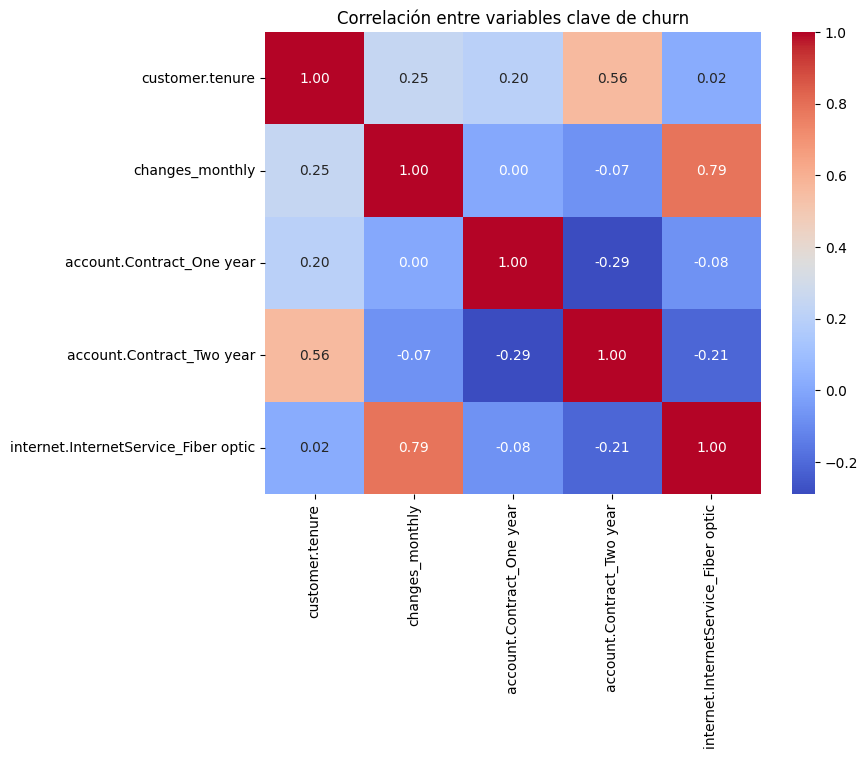

In [123]:
# Codificar contrato y tipo de internet
df_encoded = pd.get_dummies(df[['account.Contract', 'internet.InternetService']], drop_first=False)

# Crear variable de cambios mensuales (si tienes datos históricos, si no, omitir)
# Aquí solo se usa el cargo mensual actual como proxy
df['changes_monthly'] = df['account.Charges.Monthly']  # Placeholder si no tienes variación

# Construir el nuevo DataFrame con las variables clave
selected_vars = [
    'customer.tenure',
    'changes_monthly',
    'account.Contract_One year',
    'account.Contract_Two year',
    'internet.InternetService_Fiber optic'
]

df_corr = pd.concat([df[['customer.tenure', 'changes_monthly']], df_encoded[['account.Contract_One year', 'account.Contract_Two year', 'internet.InternetService_Fiber optic']]], axis=1)

# Matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlación entre variables clave de churn")
plt.show()



con la matriz de correlación igualmente puede sostenerse la misma tesis sobre el servicio que más afecta es la fibra óptica

##📊 Datos Iniciales


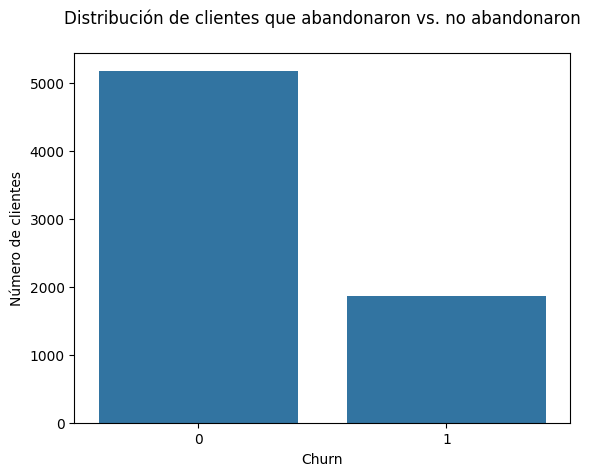

Churn
0    73.46
1    26.54
Name: proportion, dtype: float64


In [124]:
sns.countplot(data=df, x='Churn')
plt.title('Distribución de clientes que abandonaron vs. no abandonaron\n')
plt.ylabel('Número de clientes')
plt.show()

# Porcentaje
churn_rate = round(df['Churn'].value_counts(normalize=True) * 100,2)
print(churn_rate)

Los clientes con fibra óptica y poco tiempo de suscripción abandonan más temprano
Los clientes que llevan más tiempo son más leales a un tipo de servicio


###📄Informe final

Análisis de Abandono de Clientes en Telecom X
🎯 Objetivo del Análisis
Identificar las causas del abandono de clientes en Telecom X mediante técnicas de Machine Learning, con foco en variables críticas como tipo de servicio, contrato y antigüedad.

🔍 Hallazgos Principales
Tipo de Servicio: La mayoría de los clientes que abandonan están suscritos a fibra óptica y tienen activa la línea telefónica.

Antigüedad del Cliente: El abandono se concentra en clientes con menos de 7 meses de permanencia.

Tipo de Contrato: Predominan los contratos mes a mes, que permiten salida sin penalidades.

⚠️ Posibles Causas del Abandono
Expectativas no cumplidas: Posible sobreventa de beneficios del servicio de fibra óptica y telefonía.

Problemas de calidad: Fallas técnicas o atención deficiente durante los primeros meses.

Falta de fidelización: Ausencia de incentivos o propuestas de valor para nuevos clientes.

Comparación con la competencia: Clientes que prueban el servicio y luego migran a opciones más atractivas.

Contratos demasiado flexibles: El modelo mes a mes facilita el abandono sin consecuencias.

Falta de seguimiento postventa: Escasa interacción proactiva en los primeros meses.

✅ Recomendaciones Estratégicas
Revisar la oferta de fibra óptica y telefonía: Asegurar que los beneficios prometidos se cumplan, especialmente en la etapa inicial.

Diseñar campañas de fidelización temprana: Incentivos y contacto frecuente durante los primeros 6 meses.

Implementar encuestas de satisfacción post instalación: Detectar problemas en los primeros 90 días.

Mejorar soporte técnico y atención al cliente: Priorizar clientes con contrato mensual y servicio de fibra.

Reformular contratos mes a mes: Ofrecer beneficios por permanencia o migración a contratos más estables.

📊 Incorporar prácticas de Data Governance: Si Telecom X cuenta con un área de gobernanza de datos, se recomienda:

Auditar y analizar los reclamos asociados al servicio de fibra óptica.

Identificar patrones de insatisfacción por zona, tipo de instalación o proveedor técnico.

Integrar estos datos con el modelo de churn para enriquecer la comprensión del abandono.

Establecer un sistema de alertas tempranas basado en reclamos y tickets abiertos.

📌 Conclusión
El abandono se concentra en clientes nuevos con contratos flexibles y servicio de fibra óptica. Abordar esta situación con acciones preventivas, soporte reforzado y análisis profundo de reclamos puede mejorar la retención y optimizar los costos de captación.